In [3]:
%config ZMQInteractiveShell.ast_node_interactivity = "all"

# Pandas

In [ ]:
import pandas as pd

## Series

### 构造和初始化Series

#### 使用List 构造

In [245]:
# 使用List 构造

A = pd.Series(["a","b","c","d","e","f"])
A

A = pd.Series(["a","b","c","d","e","f"],
             index=["abandon",'baby','can','date','eat','factory'],name="demo")
A

0    a
1    b
2    c
3    d
4    e
5    f
dtype: object

abandon    a
baby       b
can        c
date       d
eat        e
factory    f
Name: demo, dtype: object

#### 使用Dictionary

In [246]:
# 使用Dictionary

B = pd.Series({"a":"abandon","b":"baby","c":"can","d":"date","e":"eat","f":"factory"},name="words")
B

a    abandon
b       baby
c        can
d       date
e        eat
f    factory
Name: words, dtype: object

#### 使用 np ndarray

In [247]:
# 使用 np ndarray

C = pd.Series(np.random.random((5)),index=["abandon",'baby','can','date','eat'])
C

abandon    0.554921
baby       0.726268
can        0.942544
date       0.298350
eat        0.237650
dtype: float64

### 选择数据

In [168]:
cities = {'Beijing': 55000, 'Shanghai': 60000, 'Shenzhen': 50000, 'Hangzhou': 20000, 'Guangzhou': 25000, 'Suzhou': None}
demo = pd.Series(cities, name="price")
demo

Beijing      55000.0
Shanghai     60000.0
Shenzhen     50000.0
Hangzhou     20000.0
Guangzhou    25000.0
Suzhou           NaN
Name: price, dtype: float64

In [249]:
demo[[1,3,5]] #第几个，传入列表

demo[1] # 直接给出结果

demo[[1]]

demo[1:]

demo[:-1]

Shanghai    60000.0
Hangzhou    20000.0
Suzhou          NaN
Name: price, dtype: float64

60000.0

Shanghai    60000.0
Name: price, dtype: float64

Shanghai     60000.0
Shenzhen     50000.0
Hangzhou     20000.0
Guangzhou    25000.0
Suzhou           NaN
Name: price, dtype: float64

Beijing      55000.0
Shanghai     60000.0
Shenzhen     50000.0
Hangzhou     20000.0
Guangzhou    25000.0
Name: price, dtype: float64

In [250]:
demo[["Shanghai","Shenzhen","Guangzhou"]] #第几个，传入列表

demo["Shenzhen"] # 直接给出结果

demo[["Shenzhen"]]

demo["Shenzhen":]

demo[:"Guangzhou"] 

Shanghai     60000.0
Shenzhen     50000.0
Guangzhou    25000.0
Name: price, dtype: float64

50000.0

Shenzhen    50000.0
Name: price, dtype: float64

Shenzhen     50000.0
Hangzhou     20000.0
Guangzhou    25000.0
Suzhou           NaN
Name: price, dtype: float64

Beijing      55000.0
Shanghai     60000.0
Shenzhen     50000.0
Hangzhou     20000.0
Guangzhou    25000.0
Name: price, dtype: float64

In [251]:
# 注意
demo[1:3] # 不包含
demo["Shanghai":"Hangzhou"] # 包含

Shanghai    60000.0
Shenzhen    50000.0
Name: price, dtype: float64

Shanghai    60000.0
Shenzhen    50000.0
Hangzhou    20000.0
Name: price, dtype: float64

In [252]:
"Shenzhen" in demo
"Shenzhen" not in demo

True

False

In [253]:
demo.get("Chengdu","no") # 不存在，返回自定义值

#demo["Chengdu"]  #不存在，报错

'no'

### Boolean indexing

In [254]:
demo[demo < 50000]

Hangzhou     20000.0
Guangzhou    25000.0
Name: price, dtype: float64

In [255]:
demo.median() #中位数

50000.0

In [256]:
demo[demo > demo.median()]

Beijing     55000.0
Shanghai    60000.0
Name: price, dtype: float64

In [257]:
less_than_mean = demo < demo.mean()
less_than_mean
demo[less_than_mean]

Beijing      False
Shanghai     False
Shenzhen     False
Hangzhou      True
Guangzhou     True
Suzhou       False
Name: price, dtype: bool

Hangzhou     20000.0
Guangzhou    25000.0
Name: price, dtype: float64

### Series 赋值

In [258]:
demo

Beijing      55000.0
Shanghai     60000.0
Shenzhen     50000.0
Hangzhou     20000.0
Guangzhou    25000.0
Suzhou           NaN
Name: price, dtype: float64

In [259]:
demo["Shenzhen"] = 99999
demo

Beijing      55000.0
Shanghai     60000.0
Shenzhen     99999.0
Hangzhou     20000.0
Guangzhou    25000.0
Suzhou           NaN
Name: price, dtype: float64

In [260]:
demo[demo < demo["Shenzhen"]] = 88888
demo

Beijing      88888.0
Shanghai     88888.0
Shenzhen     99999.0
Hangzhou     88888.0
Guangzhou    88888.0
Suzhou           NaN
Name: price, dtype: float64

### 查看索引和值

In [172]:
demo.values #属性

demo.keys() #方法

array([55000., 60000., 50000., 20000., 25000.,    nan])

Index(['Beijing', 'Shanghai', 'Shenzhen', 'Hangzhou', 'Guangzhou', 'Suzhou'], dtype='object')

### 数学运算

In [261]:
demo

Beijing      88888.0
Shanghai     88888.0
Shenzhen     99999.0
Hangzhou     88888.0
Guangzhou    88888.0
Suzhou           NaN
Name: price, dtype: float64

In [276]:
demo / 2

demo + 0.3

demo * 3

demo / 2

demo ** 2 

np.square(demo) #平方

np.sqrt(demo) #开平方

np.exp(demo) #e的幂次方

Beijing      27500.0
Shanghai     30000.0
Shenzhen     25000.0
Hangzhou     10000.0
Guangzhou    12500.0
Suzhou           NaN
Name: price, dtype: float64

Beijing      55000.3
Shanghai     60000.3
Shenzhen     50000.3
Hangzhou     20000.3
Guangzhou    25000.3
Suzhou           NaN
Name: price, dtype: float64

Beijing      165000.0
Shanghai     180000.0
Shenzhen     150000.0
Hangzhou      60000.0
Guangzhou     75000.0
Suzhou            NaN
Name: price, dtype: float64

Beijing      27500.0
Shanghai     30000.0
Shenzhen     25000.0
Hangzhou     10000.0
Guangzhou    12500.0
Suzhou           NaN
Name: price, dtype: float64

Beijing      3.025000e+09
Shanghai     3.600000e+09
Shenzhen     2.500000e+09
Hangzhou     4.000000e+08
Guangzhou    6.250000e+08
Suzhou                NaN
Name: price, dtype: float64

Beijing      3.025000e+09
Shanghai     3.600000e+09
Shenzhen     2.500000e+09
Hangzhou     4.000000e+08
Guangzhou    6.250000e+08
Suzhou                NaN
Name: price, dtype: float64

Beijing      234.520788
Shanghai     244.948974
Shenzhen     223.606798
Hangzhou     141.421356
Guangzhou    158.113883
Suzhou              NaN
Name: price, dtype: float64

Beijing      inf
Shanghai     inf
Shenzhen     inf
Hangzhou     inf
Guangzhou    inf
Suzhou       NaN
Name: price, dtype: float64

In [263]:
temp = pd.Series({'Beijing': 300000, 'Shanghai': 400000, 'Shenzhen': 300000, \
                      'Tianjin': 200000, 'Guangzhou': 200000, 'Chongqing': 150000})
temp

Beijing      300000
Shanghai     400000
Shenzhen     300000
Tianjin      200000
Guangzhou    200000
Chongqing    150000
dtype: int64

In [264]:
demo + temp

demo * temp

demo / temp

Beijing      388888.0
Chongqing         NaN
Guangzhou    288888.0
Hangzhou          NaN
Shanghai     488888.0
Shenzhen     399999.0
Suzhou            NaN
Tianjin           NaN
dtype: float64

Beijing      2.666640e+10
Chongqing             NaN
Guangzhou    1.777760e+10
Hangzhou              NaN
Shanghai     3.555520e+10
Shenzhen     2.999970e+10
Suzhou                NaN
Tianjin               NaN
dtype: float64

Beijing      0.296293
Chongqing         NaN
Guangzhou    0.444440
Hangzhou          NaN
Shanghai     0.222220
Shenzhen     0.333330
Suzhou            NaN
Tianjin           NaN
dtype: float64

# DataFrame

## 构造DataFrame

### 使用dictionary 构造 DataFrame

In [265]:
data = {'Citys':['Beijing','Shanghai','Guangzhou','Shenzhen','Hangzhou','Chongqing'],
       'Year':[2016,2017,2016,2017,2016,2016],
       'Population':[2100,2300,1000,700,500,500]}
data

{'Citys': ['Beijing',
  'Shanghai',
  'Guangzhou',
  'Shenzhen',
  'Hangzhou',
  'Chongqing'],
 'Year': [2016, 2017, 2016, 2017, 2016, 2016],
 'Population': [2100, 2300, 1000, 700, 500, 500]}

In [266]:
data = pd.DataFrame(data,columns=['Year','Citys','Population'],index = ['one', 'two', 'three', 'four', 'five', 'six'])
# columns指定列的顺序，index指定索引
data

,Year,Citys,Population
one,2016,Beijing,2100
two,2017,Shanghai,2300
three,2016,Guangzhou,1000
four,2017,Shenzhen,700
five,2016,Hangzhou,500
six,2016,Chongqing,500


### 使用Series 构建DataFrame

In [267]:
demo
temp

Beijing      88888.0
Shanghai     88888.0
Shenzhen     99999.0
Hangzhou     88888.0
Guangzhou    88888.0
Suzhou           NaN
Name: price, dtype: float64

Beijing      300000
Shanghai     400000
Shenzhen     300000
Tianjin      200000
Guangzhou    200000
Chongqing    150000
dtype: int64

In [268]:
df = pd.DataFrame({"demo":demo,"temp":temp})  # 与使用dictionary 一样 按列在创建
df

,demo,temp
Beijing,88888.0,300000.0
Chongqing,NaN,150000.0
Guangzhou,88888.0,200000.0
Hangzhou,88888.0,NaN
Shanghai,88888.0,400000.0
Shenzhen,99999.0,300000.0
Suzhou,NaN,NaN
Tianjin,NaN,200000.0


### 使用 list of dicts 构建DataFrame

In [269]:
data_1 = [{"A":123,"B":456,"C":789},{"A":1234,"B":4567,"C":7890}] #按行在创建

pd.DataFrame(data_1,index=["test1","test2"])

,A,B,C
test1,123,456,789
test2,1234,4567,7890


## DataFrame 操作方法

|DataFrame操作方法|说明|
|----------------|----|
|df.corr()|相关度|
|df.info()|
|df.describe()|
|df.index|
|df.index.year / df.index.month / df.index.day /df.index.weekday|
|df.columns|
|df.loc|
|df.iloc|
|df\[\]|
|df.head()|
|df.shape|
|df.dtype|
|df.rename()|
|df.sort_value()|
|df.bfill()|
|df.ffill()
|df.resample()
|df.dropna()|
|df.fillna()
|df.T
|
|

### 查找选择

In [270]:
df
df["demo"] #查看某一列

,demo,temp
Beijing,88888.0,300000.0
Chongqing,NaN,150000.0
Guangzhou,88888.0,200000.0
Hangzhou,88888.0,NaN
Shanghai,88888.0,400000.0
Shenzhen,99999.0,300000.0
Suzhou,NaN,NaN
Tianjin,NaN,200000.0


Beijing      88888.0
Chongqing        NaN
Guangzhou    88888.0
Hangzhou     88888.0
Shanghai     88888.0
Shenzhen     99999.0
Suzhou           NaN
Tianjin          NaN
Name: demo, dtype: float64

### 添加新的列

In [271]:
df
df["sum"] = df["demo"] + df["temp"]
df

,demo,temp
Beijing,88888.0,300000.0
Chongqing,NaN,150000.0
Guangzhou,88888.0,200000.0
Hangzhou,88888.0,NaN
Shanghai,88888.0,400000.0
Shenzhen,99999.0,300000.0
Suzhou,NaN,NaN
Tianjin,NaN,200000.0


,demo,temp,sum
Beijing,88888.0,300000.0,388888.0
Chongqing,NaN,150000.0,NaN
Guangzhou,88888.0,200000.0,288888.0
Hangzhou,88888.0,NaN,NaN
Shanghai,88888.0,400000.0,488888.0
Shenzhen,99999.0,300000.0,399999.0
Suzhou,NaN,NaN,NaN
Tianjin,NaN,200000.0,NaN


### 查看类型

In [272]:
type(df["demo"])

type(df.demo)

pandas.core.series.Series

pandas.core.series.Series

### loc方法拿到行

In [273]:
df
df.loc["Beijing"]
type(df.loc["Beijing"])

,demo,temp,sum
Beijing,88888.0,300000.0,388888.0
Chongqing,NaN,150000.0,NaN
Guangzhou,88888.0,200000.0,288888.0
Hangzhou,88888.0,NaN,NaN
Shanghai,88888.0,400000.0,488888.0
Shenzhen,99999.0,300000.0,399999.0
Suzhou,NaN,NaN,NaN
Tianjin,NaN,200000.0,NaN


demo     88888.0
temp    300000.0
sum     388888.0
Name: Beijing, dtype: float64

pandas.core.series.Series

### iloc 方法拿到行和列
> 把DataFrame 当做 numpy 的ndarray 来操作 

In [274]:
df
df.iloc[1] #返回的是Series

df.iloc[1:3,1:3] #行切片，列切片 返回的是DataFrame

,demo,temp,sum
Beijing,88888.0,300000.0,388888.0
Chongqing,NaN,150000.0,NaN
Guangzhou,88888.0,200000.0,288888.0
Hangzhou,88888.0,NaN,NaN
Shanghai,88888.0,400000.0,488888.0
Shenzhen,99999.0,300000.0,399999.0
Suzhou,NaN,NaN,NaN
Tianjin,NaN,200000.0,NaN


demo         NaN
temp    150000.0
sum          NaN
Name: Chongqing, dtype: float64

,temp,sum
Chongqing,150000.0,NaN
Guangzhou,200000.0,288888.0


## DataFrame 元素赋值

### 给某个元素赋值

In [275]:
df.at["Beijing","demo"]

df.at["Beijing","demo"] = 33333

df.loc["Beijing","temp"] = 5555

df

88888.0

,demo,temp,sum
Beijing,33333.0,5555.0,388888.0
Chongqing,NaN,150000.0,NaN
Guangzhou,88888.0,200000.0,288888.0
Hangzhou,88888.0,NaN,NaN
Shanghai,88888.0,400000.0,488888.0
Shenzhen,99999.0,300000.0,399999.0
Suzhou,NaN,NaN,NaN
Tianjin,NaN,200000.0,NaN


### 给一整列赋值

In [276]:
df["demo"] = 1
df.temp = 2
df

,demo,temp,sum
Beijing,1,2,388888.0
Chongqing,1,2,NaN
Guangzhou,1,2,288888.0
Hangzhou,1,2,NaN
Shanghai,1,2,488888.0
Shenzhen,1,2,399999.0
Suzhou,1,2,NaN
Tianjin,1,2,NaN


In [288]:
df["ok"] = 0
df["ok"] = np.arange(8)
df

,demo,temp,sum,ok
Beijing,99,99,20,0
Chongqing,1,2,14,1
Guangzhou,1,2,14,2
Hangzhou,1,2,14,3
Shanghai,1,2,14,4
Shenzhen,1,2,14,5
Suzhou,1,2,14,6
Tianjin,1,2,14,7


### 给一整行赋值

In [277]:
df.loc["Beijing"] = 99

df

,demo,temp,sum
Beijing,99,99,99.0
Chongqing,1,2,NaN
Guangzhou,1,2,288888.0
Hangzhou,1,2,NaN
Shanghai,1,2,488888.0
Shenzhen,1,2,399999.0
Suzhou,1,2,NaN
Tianjin,1,2,NaN


In [280]:
df.loc[:,"sum"] = 14
df

df.loc["Beijing","sum"] = 20
df

,demo,temp,sum
Beijing,99,99,14
Chongqing,1,2,14
Guangzhou,1,2,14
Hangzhou,1,2,14
Shanghai,1,2,14
Shenzhen,1,2,14
Suzhou,1,2,14
Tianjin,1,2,14


,demo,temp,sum
Beijing,99,99,20
Chongqing,1,2,14
Guangzhou,1,2,14
Hangzhou,1,2,14
Shanghai,1,2,14
Shenzhen,1,2,14
Suzhou,1,2,14
Tianjin,1,2,14


### 使用Series 指定修改

In [293]:
val = pd.Series([100,200,300],index=["Beijing","Guangzhou","Shenzhen"]) # 缺失值填充NaN

df["ok"] = val
df

,demo,temp,sum,ok
Beijing,99,99,20,100.0
Chongqing,1,2,14,NaN
Guangzhou,1,2,14,200.0
Hangzhou,1,2,14,NaN
Shanghai,1,2,14,NaN
Shenzhen,1,2,14,300.0
Suzhou,1,2,14,NaN
Tianjin,1,2,14,NaN


In [295]:
df["ook"] = (df.index == "Beijing")
df

,demo,temp,sum,ok,ook
Beijing,99,99,20,100.0,True
Chongqing,1,2,14,NaN,False
Guangzhou,1,2,14,200.0,False
Hangzhou,1,2,14,NaN,False
Shanghai,1,2,14,NaN,False
Shenzhen,1,2,14,300.0,False
Suzhou,1,2,14,NaN,False
Tianjin,1,2,14,NaN,False


### 查看columns 、 index、元素

In [300]:
df.index
type(df.index)

df.columns
type(df.columns)

df.values
type(df.values)

Index(['Beijing', 'Chongqing', 'Guangzhou', 'Hangzhou', 'Shanghai', 'Shenzhen',
       'Suzhou', 'Tianjin'],
      dtype='object', name='citys')

pandas.core.indexes.base.Index

Index(['demo', 'temp', 'sum', 'ok', 'ook'], dtype='object', name='times')

pandas.core.indexes.base.Index

array([[99, 99, 20, 100.0, True],
       [1, 2, 14, nan, False],
       [1, 2, 14, 200.0, False],
       [1, 2, 14, nan, False],
       [1, 2, 14, nan, False],
       [1, 2, 14, 300.0, False],
       [1, 2, 14, nan, False],
       [1, 2, 14, nan, False]], dtype=object)

numpy.ndarray

### DataFrame 转置

In [296]:
df.T

,Beijing,Chongqing,Guangzhou,Hangzhou,Shanghai,Shenzhen,Suzhou,Tianjin
demo,99,1,1,1,1,1,1,1
temp,99,2,2,2,2,2,2,2
sum,20,14,14,14,14,14,14,14
ok,100,NaN,200,NaN,NaN,300,NaN,NaN
ook,True,False,False,False,False,False,False,False


### 指定index,columns 名字

In [298]:
df.index.name = "citys"
df.columns.name = "times"

df

times,demo,temp,sum,ok,ook
citys,,,,,
Beijing,99,99,20,100.0,True
Chongqing,1,2,14,NaN,False
Guangzhou,1,2,14,200.0,False
Hangzhou,1,2,14,NaN,False
Shanghai,1,2,14,NaN,False
Shenzhen,1,2,14,300.0,False
Suzhou,1,2,14,NaN,False
Tianjin,1,2,14,NaN,False


## csv 文件读写

### 读取read_csv

In [ ]:
data = pd.read_csv("Pokemon.csv",index_col=0,parse_dates=[0],sep=",") 
#index_col 指定某列为index    parse_dates=[0] 指定时间格式 sep 分隔符号
data.head(10)  #查看前10行，无参数默认5行

In [384]:
data.tail() #最后几行

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [307]:
data.describe() #获取描述
'''
count 总数，行数
mean 平均数
std 标准差，方差
min 最小值
25% 1/4
50% 1/2
75% 3/4
max 最大值
'''

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


'\ncount 总数，行数\nmean 平均数\nstd 标准差，方差\nmin 最小值\n25% 1/4\n50% 1/2\n75% 3/4\nmax 最大值\n'

### 数据处理

#### 数据缺失

In [309]:
data.loc[data["Type 2"].isnull(),"Type 2"] = data.loc[data["Type 2"].isnull(),"Type 1"]
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


In [313]:
df.notnull()
df.isnull()

times,demo,temp,sum,ok,ook
citys,,,,,
Beijing,True,True,True,True,True
Chongqing,True,True,True,False,True
Guangzhou,True,True,True,True,True
Hangzhou,True,True,True,False,True
Shanghai,True,True,True,False,True
Shenzhen,True,True,True,True,True
Suzhou,True,True,True,False,True
Tianjin,True,True,True,False,True


times,demo,temp,sum,ok,ook
citys,,,,,
Beijing,False,False,False,False,False
Chongqing,False,False,False,True,False
Guangzhou,False,False,False,False,False
Hangzhou,False,False,False,True,False
Shanghai,False,False,False,True,False
Shenzhen,False,False,False,False,False
Suzhou,False,False,False,True,False
Tianjin,False,False,False,True,False


In [317]:
df[df.isnull()]
df[df.notnull()]
df[df.isnull() == False]

times,demo,temp,sum,ok,ook
citys,,,,,
Beijing,NaN,NaN,NaN,NaN,NaN
Chongqing,NaN,NaN,NaN,NaN,NaN
Guangzhou,NaN,NaN,NaN,NaN,NaN
Hangzhou,NaN,NaN,NaN,NaN,NaN
Shanghai,NaN,NaN,NaN,NaN,NaN
Shenzhen,NaN,NaN,NaN,NaN,NaN
Suzhou,NaN,NaN,NaN,NaN,NaN
Tianjin,NaN,NaN,NaN,NaN,NaN


times,demo,temp,sum,ok,ook
citys,,,,,
Beijing,99,99,20,100.0,True
Chongqing,1,2,14,NaN,False
Guangzhou,1,2,14,200.0,False
Hangzhou,1,2,14,NaN,False
Shanghai,1,2,14,NaN,False
Shenzhen,1,2,14,300.0,False
Suzhou,1,2,14,NaN,False
Tianjin,1,2,14,NaN,False


times,demo,temp,sum,ok,ook
citys,,,,,
Beijing,99,99,20,100.0,True
Chongqing,1,2,14,NaN,False
Guangzhou,1,2,14,200.0,False
Hangzhou,1,2,14,NaN,False
Shanghai,1,2,14,NaN,False
Shenzhen,1,2,14,300.0,False
Suzhou,1,2,14,NaN,False
Tianjin,1,2,14,NaN,False


### 写入to_csv

In [318]:
df

times,demo,temp,sum,ok,ook
citys,,,,,
Beijing,99,99,20,100.0,True
Chongqing,1,2,14,NaN,False
Guangzhou,1,2,14,200.0,False
Hangzhou,1,2,14,NaN,False
Shanghai,1,2,14,NaN,False
Shenzhen,1,2,14,300.0,False
Suzhou,1,2,14,NaN,False
Tianjin,1,2,14,NaN,False


In [319]:
df.to_csv("demo.csv",sep="\t")

In [322]:
df1 = pd.DataFrame(np.random.rand(10,4),columns=list("abcd"))
df1

,a,b,c,d
0,0.519437,0.383507,0.704389,0.026589
1,0.529531,0.980269,0.973755,0.630403
2,0.342384,0.013076,0.092851,0.658556
3,0.242307,0.509692,0.004170,0.543422
4,0.643303,0.082478,0.742589,0.217779
5,0.368559,0.414068,0.625945,0.140126
6,0.111214,0.502865,0.910749,0.065822
7,0.564466,0.363837,0.987679,0.301395
8,0.197075,0.119854,0.114964,0.926600
9,0.303308,0.777349,0.547898,0.055350


In [325]:
df1.add(pd.Series(np.ones(10)) * 10 ,axis=0  )

,a,b,c,d
0,10.519437,10.383507,10.704389,10.026589
1,10.529531,10.980269,10.973755,10.630403
2,10.342384,10.013076,10.092851,10.658556
3,10.242307,10.509692,10.004170,10.543422
4,10.643303,10.082478,10.742589,10.217779
5,10.368559,10.414068,10.625945,10.140126
6,10.111214,10.502865,10.910749,10.065822
7,10.564466,10.363837,10.987679,10.301395
8,10.197075,10.119854,10.114964,10.926600
9,10.303308,10.777349,10.547898,10.055350


## Index

### index object

In [326]:
x = pd.Series(range(4),index = list("abcd"))
y = x.index

x
y
y[1:3]

a    0
b    1
c    2
d    3
dtype: int64

Index(['a', 'b', 'c', 'd'], dtype='object')

Index(['b', 'c'], dtype='object')

In [327]:
# index[1] = "c" 会报错

### 针对index进行索引和切片

In [328]:
x["a"]

0

In [334]:
x[1]
x[[1,3]]
x[1:3]

x["a":"b"]
x["a":"b"] = 5
x

5

b    5
d    3
dtype: int64

b    5
c    2
dtype: int64

a    5
b    5
dtype: int64

a    5
b    5
c    2
d    3
dtype: int64

In [335]:
df

times,demo,temp,sum,ok,ook
citys,,,,,
Beijing,99,99,20,100.0,True
Chongqing,1,2,14,NaN,False
Guangzhou,1,2,14,200.0,False
Hangzhou,1,2,14,NaN,False
Shanghai,1,2,14,NaN,False
Shenzhen,1,2,14,300.0,False
Suzhou,1,2,14,NaN,False
Tianjin,1,2,14,NaN,False


In [336]:
df[:2]

times,demo,temp,sum,ok,ook
citys,,,,,
Beijing,99,99,20,100.0,True
Chongqing,1,2,14,NaN,False


In [337]:
df.loc["Beijing"]

times
demo      99
temp      99
sum       20
ok       100
ook     True
Name: Beijing, dtype: object

In [338]:
df.loc[["Beijing","Shanghai"],["demo","temp"]]

times,demo,temp
citys,,
Beijing,99,99
Shanghai,1,2


In [342]:
df.loc[:"Shenzhen","demo":"ok"]

times,demo,temp,sum,ok
citys,,,,
Beijing,99,99,20,100.0
Chongqing,1,2,14,NaN
Guangzhou,1,2,14,200.0
Hangzhou,1,2,14,NaN
Shanghai,1,2,14,NaN
Shenzhen,1,2,14,300.0


### reindex  -- Series

In [344]:
q = pd.Series(range(10),index=list("abcdefghij"))
q

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
dtype: int64

In [350]:
q.reindex(list("adcbhijdef"))  #重新排列index

a    0
d    3
c    2
b    1
h    7
i    8
j    9
d    3
e    4
f    5
dtype: int64

In [352]:
q.reindex(list("adcbhijdefs"),fill_value = 0) #不存在的index 填充0

a    0
d    3
c    2
b    1
h    7
i    8
j    9
d    3
e    4
f    5
s    0
dtype: int64

In [356]:
q.reindex(list("adcbhijfdes"),method="ffill") #填充为原来的前面的数字

a    0
d    3
c    2
b    1
h    7
i    8
j    9
f    5
d    3
e    4
s    9
dtype: int64

In [358]:
q.reindex(list("adcbhijfdes"),method="bfill") #填充为原来的后面的数字

a    0.0
d    3.0
c    2.0
b    1.0
h    7.0
i    8.0
j    9.0
f    5.0
d    3.0
e    4.0
s    NaN
dtype: float64

### reindex --DataFrame

In [359]:
df

times,demo,temp,sum,ok,ook
citys,,,,,
Beijing,99,99,20,100.0,True
Chongqing,1,2,14,NaN,False
Guangzhou,1,2,14,200.0,False
Hangzhou,1,2,14,NaN,False
Shanghai,1,2,14,NaN,False
Shenzhen,1,2,14,300.0,False
Suzhou,1,2,14,NaN,False
Tianjin,1,2,14,NaN,False


In [364]:
df.reindex(index=["Beijing","Shanghai","Guangzhou","Shenzhen","Chongqing","Hangzhou","Suzhou","Tianjin"] ,
           columns= ["demo","ok","temp","ook"])

times,demo,ok,temp,ook
citys,,,,
Beijing,99,100.0,99,True
Shanghai,1,NaN,2,False
Guangzhou,1,200.0,2,False
Shenzhen,1,300.0,2,False
Chongqing,1,NaN,2,False
Hangzhou,1,NaN,2,False
Suzhou,1,NaN,2,False
Tianjin,1,NaN,2,False


## drop 删除

### 删除行

In [373]:
qq = df.drop("Beijing") #返回新的DataFrame 旧的没有改变
qq
df

times,demo,temp,sum,ok,ook
citys,,,,,
Chongqing,1,2,14,NaN,False
Guangzhou,1,2,14,200.0,False
Hangzhou,1,2,14,NaN,False
Shanghai,1,2,14,NaN,False
Shenzhen,1,2,14,300.0,False
Suzhou,1,2,14,NaN,False
Tianjin,1,2,14,NaN,False


times,demo,temp,sum,ok,ook
citys,,,,,
Beijing,99,99,20,100.0,True
Chongqing,1,2,14,NaN,False
Guangzhou,1,2,14,200.0,False
Hangzhou,1,2,14,NaN,False
Shanghai,1,2,14,NaN,False
Shenzhen,1,2,14,300.0,False
Suzhou,1,2,14,NaN,False
Tianjin,1,2,14,NaN,False


In [375]:
qqq = df.drop(["Beijing","Shanghai"])
qqq

times,demo,temp,sum,ok,ook
citys,,,,,
Chongqing,1,2,14,NaN,False
Guangzhou,1,2,14,200.0,False
Hangzhou,1,2,14,NaN,False
Shenzhen,1,2,14,300.0,False
Suzhou,1,2,14,NaN,False
Tianjin,1,2,14,NaN,False


### 删除列

In [377]:
w = df.drop(["ook","ok"],axis=1)
w

times,demo,temp,sum
citys,,,
Beijing,99,99,20
Chongqing,1,2,14
Guangzhou,1,2,14
Hangzhou,1,2,14
Shanghai,1,2,14
Shenzhen,1,2,14
Suzhou,1,2,14
Tianjin,1,2,14


## Groupby

> 按照规则合并，返回一个Groupby对象

* groupby 之后做一些aggregate(聚合)的操作


* groupby obj = DataFrame.groupby(\[需要合并的列,超过一个，使用列表\]，sort=True)


* aggregate 的别名用 agg


|操作|说明|
|---|---|
|groupby_obj.sum() & groupby_obj.agg(sum)|求和|
|groupby_obj.size()| 查看大小|
|groupby_obj.mean()| 求平均|
|groupby_obj.median()| 求中位数|
|groupby_obj.describe()| 每一组的详细信息|
|groupby_obj.agg(func)|传入函数,函数作用给groupby之后的列的元素|
|groupby_obj.groups|查看分组|
|groupby_obj.get_group("A")|拿到组名为A的组|
|groupby_obj.transform(func)|transform 会把group中的每个record都按照同样的规则转化|
|groupby_obj.apply(func)|与transform类似|
|groupby_obj.
|groupby_obj.
|groupby_obj.

### Groupby aggregate

In [173]:
salaries = pd.DataFrame({
    'Name': ['July', 'Zewei', 'Zewei', 'Han', 'July', 'July', 'Zewei', 'July'],
    'Year': [2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary': [10000,2000,4000,5000,18000,25000,3000,4000],
    'Bonus': [3000,1000,1000,1200,4000,2300,500,1000]
})
salaries

,Name,Year,Salary,Bonus
0,July,2016,10000,3000
1,Zewei,2016,2000,1000
2,Zewei,2016,4000,1000
3,Han,2016,5000,1200
4,July,2017,18000,4000
5,July,2017,25000,2300
6,Zewei,2017,3000,500
7,July,2017,4000,1000


In [176]:
salaries_name = salaries.groupby("Name")

In [182]:
salaries_name.agg(lambda x : list(x))

,Year,Salary,Bonus
Name,,,
Han,[2016],[5000],[1200]
July,"[2016, 2017, 2017, 2017]","[10000, 18000, 25000, 4000]","[3000, 4000, 2300, 1000]"
Zewei,"[2016, 2016, 2017]","[2000, 4000, 3000]","[1000, 1000, 500]"


#### 对同一列采用多个agg

In [184]:
salaries_name.agg([np.sum,np.mean,np.std])

Year                       Salary                      Bonus  \
        sum         mean      std    sum   mean          std    sum   
Name                                                                  
Han    2016  2016.000000      NaN   5000   5000          NaN   1200   
July   8067  2016.750000  0.50000  57000  14250  9178.779875  10300   
Zewei  6049  2016.333333  0.57735   9000   3000  1000.000000   2500   

                                 
              mean          std  
Name                             
Han    1200.000000          NaN  
July   2575.000000  1260.621540  
Zewei   833.333333   288.675135

#### 对不同列采用不同agg

In [186]:
salaries_name.agg({"Bonus":np.mean,"Salary":np.sum})

,Bonus,Salary
Name,,
Han,1200.000000,5000
July,2575.000000,57000
Zewei,833.333333,9000


### iterate GroupBy Object

In [183]:
for name,group in salaries_name:
    print(name)
    print(group)
    print(type(group))
    print()

Han
  Name  Year  Salary  Bonus
3  Han  2016    5000   1200
<class 'pandas.core.frame.DataFrame'>

July
   Name  Year  Salary  Bonus
0  July  2016   10000   3000
4  July  2017   18000   4000
5  July  2017   25000   2300
7  July  2017    4000   1000
<class 'pandas.core.frame.DataFrame'>

Zewei
    Name  Year  Salary  Bonus
1  Zewei  2016    2000   1000
2  Zewei  2016    4000   1000
6  Zewei  2017    3000    500
<class 'pandas.core.frame.DataFrame'>



### transform

> transform 会把group中的每个record都按照同样的规则转化

In [189]:
nvda = pd.read_csv("../集训营/第二周Pandas/data/NVDA.csv", index_col=0, parse_dates=[0])

nvda.groupby(nvda.index.year).mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999,1.950782,2.007317,1.883559,1.947230,1.808134,6.433220e+06
2000,8.781084,9.222697,8.360522,8.778826,8.151729,1.104182e+07
2001,13.091254,13.600750,12.680548,13.181552,12.239956,2.782387e+07
2002,9.690344,9.955093,9.344391,9.614749,8.927940,3.168655e+07
2003,5.902434,6.042659,5.764960,5.900344,5.478865,2.430220e+07


In [192]:
zscore = lambda x :(x.max() - x) / x  # 定义一个函数

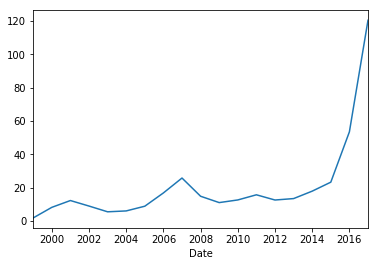

In [198]:
nvda_g = nvda.groupby(nvda.index.year).mean()
nvda_g["Adj Close"].plot()

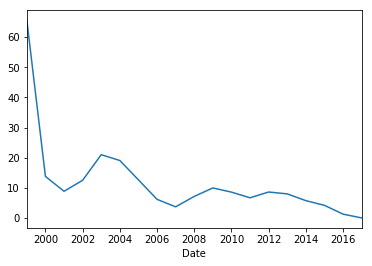

In [197]:
nvda_g.transform(zscore)["Adj Close"].plot()

In [205]:
nvda.groupby(nvda.index.year).transform(lambda x :list(x)[-1]).loc["1999-12-27":"2000-01-05"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-27,3.856767,3.916667,3.843750,3.911458,3.632052,3183600.0
1999-12-28,3.856767,3.916667,3.843750,3.911458,3.632052,3183600.0
1999-12-29,3.856767,3.916667,3.843750,3.911458,3.632052,3183600.0
1999-12-30,3.856767,3.916667,3.843750,3.911458,3.632052,3183600.0
1999-12-31,3.856767,3.916667,3.843750,3.911458,3.632052,3183600.0
2000-01-03,6.000000,6.197917,5.333333,5.460933,5.070842,12379200.0
2000-01-04,6.000000,6.197917,5.333333,5.460933,5.070842,12379200.0
2000-01-05,6.000000,6.197917,5.333333,5.460933,5.070842,12379200.0


### transpose

### filter

> 找出符合统计特征的一些内容,group_obj.filter(func)

In [211]:
s = pd.Series([1,2,3,4,4,3,2,1,5])
s.groupby(s).filter(lambda x : x.sum() >4)
s.filter([1,2,3])

2    3
3    4
4    4
5    3
8    5
dtype: int64

1    2
2    3
3    4
dtype: int64

In [210]:
df = pd.DataFrame({"A": np.arange(8), "B":list("aaabbbcc")})
df.groupby("B").filter(lambda x : len(x) > 2)

,A,B
0,0,a
1,1,a
2,2,a
3,3,b
4,4,b
5,5,b


### groupby小结： 
Group by: split-apply-combine
- 首先第一步是分离数据split，按照一定的规则把数据分成几类。
- 第二步是对每一部分数据都做一定的操作，这个操作可以是汇总操作aggregate，可以是一个变换transform，也可以是过滤数据filter。
- 最后一步就是把处理过的数据再合成一张DataFrame。

## 表格匹配与拼接

> * concat
> * append
> * merge
> * join

In [245]:
df1 = pd.DataFrame({'apts': [55000, 60000],'cars': [200000, 300000],},index = ['Shanghai', 'Beijing'])

df2 = pd.DataFrame({'cars': [150000, 120000],'apts': [25000, 20000],},index = ['Hangzhou', 'Najing'])

df3 = pd.DataFrame({'apts': [30000, 10000],'cars': [180000, 100000],},index = ['Guangzhou', 'Chongqing'])

df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},index = ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])

df5 = pd.DataFrame({'apts': [55000, 60000, 58000],'cars': [200000, 300000,250000],'city': ['Shanghai', 'Beijing','Shenzhen']})

df6 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000],'city': ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin']})

### concatenate

In [233]:
# pd.concat( [], sort= , join=" ", keys=[], axis= )

# [] 需要拼接的表
# sort=True 默认排序，False 关闭排序
# keys=[] 外加一层index,数量是拼接表的个数
# axis=0 行拼接，1列拼接
# join='inner' 忽略NaN ,"outer"，保留NaN 忽略的是行

In [226]:
result1 = pd.concat([df1,df2,df3],sort=False)
result1

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Najing,20000,120000
Guangzhou,30000,180000
Chongqing,10000,100000


In [227]:
result2 = pd.concat([df1,df2,df3],sort=False,keys=["A","B","C"])
result2

apts    cars
A Shanghai   55000  200000
  Beijing    60000  300000
B Hangzhou   25000  150000
  Najing     20000  120000
C Guangzhou  30000  180000
  Chongqing  10000  100000

In [228]:
result2.loc["A"]
result2.loc["A","Beijing"]

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000


apts     60000
cars    300000
Name: (A, Beijing), dtype: int64

In [229]:
result3 = pd.concat([result1,df4],axis=1,sort=False,join="inner")
result3

,apts,cars,salaries
Shanghai,55000,200000,30000
Beijing,60000,300000,30000
Guangzhou,30000,180000,20000


In [ ]:
# Series和DataFrame还可以被一起concatenate，这时候Series会先被转成DataFrame然后做Join，
# 因为Series本来就是一个只有一维的DataFrame。

In [238]:
s1 = pd.Series([60, 50], index=['Shanghai', 'Beijing'], name='meal')

pd.concat([df1,s1],axis=1)

,apts,cars,meal
Shanghai,55000,200000,60
Beijing,60000,300000,50


### append

In [241]:
# DataFrame.append(df/Series , sort= )

In [234]:
df1.append(df2,sort=False)

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Najing,20000,120000


In [240]:
# append 一个row 到DataFrame

s2 = pd.Series([28000, 180000], index=["apts", "cars"], name="Xiamen")

df1.append(s2)

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Xiamen,28000,180000


### merge

In [250]:
# pd.merge(df1,df2,on=" " , how=" ")

# df1,df2 需要拼接的表
# on = " index" 需要匹配的地方
# how = “ ” right,left 保留df2,df1

In [248]:
result4 = pd.merge(df5,df6,on="city",how="right")
result4

,apts,cars,city,salaries
0,55000.0,200000.0,Shanghai,30000
1,60000.0,300000.0,Beijing,30000
2,NaN,NaN,Suzhou,10000
3,NaN,NaN,Guangzhou,20000
4,NaN,NaN,Tianjin,15000


In [249]:
# 用concat操作上述

pd.concat([df5.set_index("city"),df6.set_index("city")],sort=False, axis=1 ,join="outer")

,apts,cars,salaries
Shanghai,55000.0,200000.0,30000.0
Beijing,60000.0,300000.0,30000.0
Shenzhen,58000.0,250000.0,NaN
Suzhou,NaN,NaN,10000.0
Guangzhou,NaN,NaN,20000.0
Tianjin,NaN,NaN,15000.0


### join

In [ ]:
# df1.join(df2) 将df2 加入到df1 中

In [256]:
df5_1 = df5.set_index("city")
df6_1 = df6.set_index("city")

In [254]:
df5_1.join(df6_1)

,apts,cars,salaries
city,,,
Shanghai,55000,200000,30000.0
Beijing,60000,300000,30000.0
Shenzhen,58000,250000,NaN


In [258]:
# 使用merge

pd.merge(df5_1,df6_1,left_index=True,right_index=True,how="inner")

,apts,cars,salaries
city,,,
Shanghai,55000,200000,30000
Beijing,60000,300000,30000


In [260]:
# 使用concat
pd.concat([df5_1,df6_1],sort=False,axis=1,join="inner")

,apts,cars,salaries
city,,,
Shanghai,55000,200000,30000
Beijing,60000,300000,30000


In [261]:
result1

,apts,cars
Shanghai,55000,200000
Beijing,60000,300000
Hangzhou,25000,150000
Najing,20000,120000
Guangzhou,30000,180000
Chongqing,10000,100000
